In [162]:
import os

def add_character_to_list_elements(input_list, char):
    # 문자열 리스트의 각 요소에 특정 문자(하위 경로)를 추가하는 메서드

    new_list = []
    for element in input_list:
        new_list.append(char + element)
    return new_list

path = './data/'
file_list = os.listdir(path)

file_list = add_character_to_list_elements(file_list, path)

In [163]:
file_list

['./data/data.csv']

In [164]:
import pandas as pd

i = 0
file_list[i]

'./data/data.csv'

In [165]:
data = pd.read_csv(file_list[i])
data

,timestamps,TC_Speed,Vtc_vVeh16,Epm_N1tooth
0,0.006711,34939.120000,45.968750,1661.000000
1,0.010480,34971.246956,45.968750,1661.000000
2,0.010630,34972.525556,45.968750,1660.954670
3,0.016711,35024.360000,45.969224,1659.117005
4,0.026711,35127.520000,45.970003,1656.095027
...,...,...,...,...
610395,3572.502276,8754.040000,0.000000,650.539497
610396,3572.505639,8751.497572,0.000000,652.000000
610397,3572.512276,8746.480000,0.000000,652.000000
610398,3572.522276,8741.280000,0.000000,652.000000


In [166]:
file_list[i]

'./data/data.csv'

In [167]:
file_list[i] = file_list[i].strip(".csv")
file_list[i]


'/data/data'

In [168]:
# file_list[i] = file_list[i].lstrip("./data/")
# file_list[i] = file_list[i].strip("/data/")      # 왜 다 지워버리나? (250819)

# strip 댜신 replace를 이용하자 (250819)
file_list[i] = file_list[i].replace('/data/', '')
file_list[i]

'data'

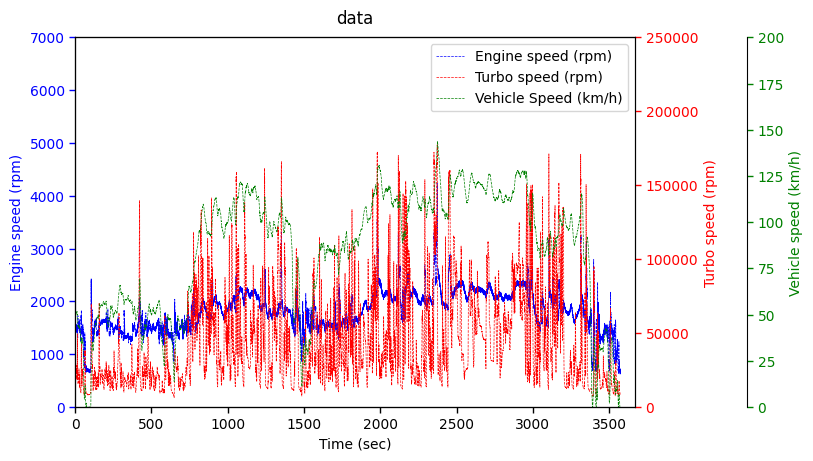

In [169]:
# 다른 스케일의 그래프 여러 개 그리기

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.subplots_adjust(right=1)

twin1 = ax.twinx()
twin2 = ax.twinx()
#twin3 = ax.twinx()

twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot(data.iloc[:, 0], data.iloc[:, 3], "b--", linewidth=0.5, label=("Engine speed (rpm)"))
p2, = twin1.plot(data.iloc[:, 0], data.iloc[:, 1], "r--", linewidth=0.5, label=("Turbo speed (rpm)"))
p3, = twin2.plot(data.iloc[:, 0], data.iloc[:, 2], "g--", linewidth=0.5, label=("Vehicle Speed (km/h)"))

ax.set_xlim(0, round(data.iloc[-1, 0]+100, -1))
ax.set_ylim(0, 7000)
twin1.set_ylim(0, 250000)
twin2.set_ylim(0, 200)

ax.set_xlabel("Time (sec)")
ax.set_ylabel("Engine speed (rpm)")
twin1.set_ylabel("Turbo speed (rpm)")
twin2.set_ylabel("Vehicle speed (km/h)")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

ax.legend(handles=[p1, p2, p3])
plt.title(file_list[i], pad=10)
# plt.show()

# 그래프를 이미지 파일로 일괄 출력
file_list[i] = file_list[i] + '.png'
plt.savefig(file_list[i], facecolor='#ffffff', bbox_inches='tight')

In [170]:
print(title)